<Axes: >

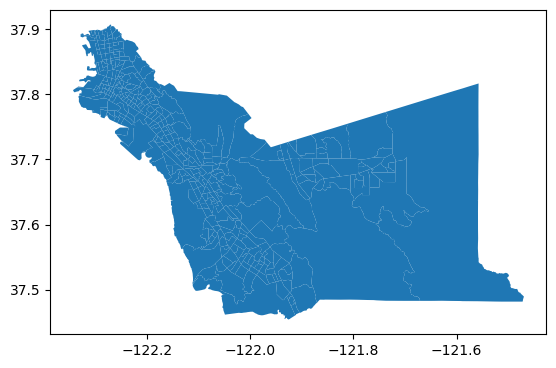

In [15]:
import geopandas
import pandas
import matplotlib.pyplot as plt

gdf_ala = geopandas.read_file("/workspaces/CYPLAN-255/raw_census_tracts/census_tracts/Census_Tract_Boundaries_7506545346012929933.geojson")

new_names = (
    gdf_ala.columns
    .str.replace(' #', '_num')
    .str.replace('-', '_') # this is for one problem making column `'community - board'`
    .str.replace(' ', '_')
    .str.lower()
)

if new_names.is_unique == 1:
    gdf_ala.columns = new_names # updates my column names
gdf_ala.columns

gdf_ala['dist_name'] = gdf_ala['dist_name'].str.replace('CENSUS TRACT #', 'Census Tract ')

gdf_ala.plot()
# gdf_ala.head()

<Axes: >

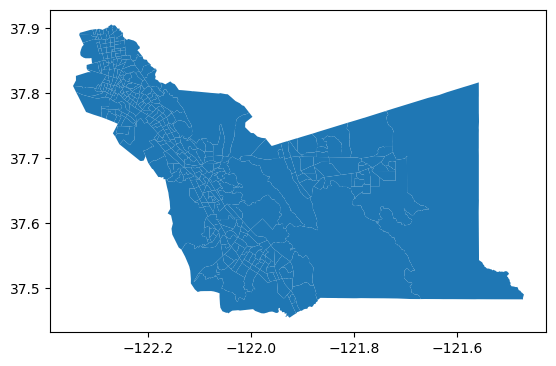

In [32]:
import geopandas
import matplotlib.pyplot as plt

gdf_acs = geopandas.read_file("/workspaces/CYPLAN-255/raw_census_tracts/census_tracts/tl_2023_06_tract.shp")

new_names = (
    gdf_acs.columns
    .str.replace(' #', '_num')
    .str.replace('-', '_') # this is for one problem making column `'community - board'`
    .str.replace(' ', '_')
    .str.lower()
)

if new_names.is_unique == 1:
    gdf_acs.columns = new_names # updates my column names
gdf_acs.columns

gdf_acs

gdf_acs['intptlon'] = gdf_acs['intptlon'].astype(float)

mask = gdf_acs['namelsad'].isin(gdf_ala['dist_name'].to_list()) & (gdf_acs['intptlon'] < -119) # This also returns a Boolean mask
gdf_acs_ala = gdf_acs.loc[mask]
gdf_acs_ala

pandas.set_option('display.max_rows', None)
gdf_acs_ala

gdf_acs_ala.to_file("/workspaces/CYPLAN-255/final_census_tracts/acs_ala_ct.geojson", driver="GeoJSON")
gdf_acs_ala.plot()
